# Programación para *Data Science*

Unidad 4: Librerías científicas en Python - Matplotlib
------------------------------------------------------

### Instrucciones de uso
A continuación se presentarán explicaciones y ejemplos de uso de la librería Matplotlib. Recordad que podéis ir ejecutando los ejemplos para obtener sus resultados.

### Introducción
El código de Matplotlib está dividido en tres partes: *pylab*, *matplotlib API* y *backends*. La primera parte, *pylab*, es la interfaz que permite crear gráficos con un código y funcionamiento muy similar a como se haría en Matlab. *Matplotlib API* es la parte esencial que el resto de código utiliza y, por último, *backends* es la parte encargada de la representación dependiente de la plataforma (tipos de ficheros de imagen, dispositivos de visualización, etc.). En este módulo solo cubriremos ejemplos y ejercicios utilizando *pylab*.

Podéis consultar muchos ejemplos en la [ayuda de la librería](http://matplotlib.org/1.3.1/examples/index.html). 


### Ejemplo 1: representar la función coseno
Vamos con el primer ejemplo en el que representaremos dos _arrays_, uno frente a otro, en los ejes *x* e *y* respectivamente. **Notad que para que los gráficos se muestren en el mismo Notebook debemos añadir la directiva especial:** *%matplotlib inline*.

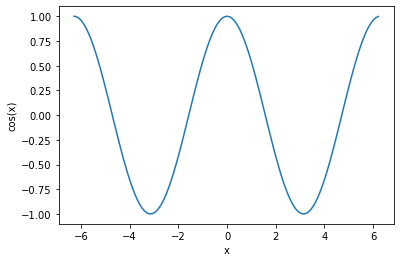

In [1]:
%matplotlib inline

# Este primer import es necesario para inicializar el entorno de Matplotlib.
import matplotlib
import numpy as np
# Importamos la librería utilizando el alias 'plt'.
import matplotlib.pyplot as plt

# Calculamos un array de -2*PI a 2*PI con un paso de 0.1.
x = np.arange(-2*np.pi, 2*np.pi, 0.1)

# Representamos el array x frente al valor de cos(x).
plt.plot(x, np.cos(x))

# Añadimos los nombres a los ejes x e y respectivamente:
plt.xlabel('x')
plt.ylabel('cos(x)')

# Finalmente mostramos el gráfico.
plt.show()

### Ejemplo 2: Representar las funciones coseno y seno a la vez
En este ejemplo, calcularemos los valores de las funciones seno y coseno para el mismo rango de valores y las representaremos en el mismo gráfico.

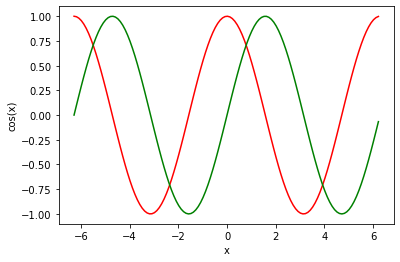

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Calculamos un array de -2*PI a 2*PI con un paso de 0.1.
x = np.arange(-2*np.pi, 2*np.pi, 0.1)

# Podemos encadenar la representación de múltiples funciones en el mismo gráfico.
# En este orden: array x, cos(x), 'r' hará utilizar el color rojo (red), array x, sin(x) y verde (green).
plt.plot(x, np.cos(x), 'r', x, np.sin(x), 'g')

# De forma equivalente, podríamos llamar en dos ocasiones a la función plot:
# plt.plot(x, np.cos(x), 'r')
# plt.plot(x, np.sin(x), 'g')

# Añadimos los nombres a los ejes x e y respectivamente:
plt.xlabel('x')
plt.ylabel('cos(x)')

# Finalmente mostramos el gráfico.
plt.show()

### Ejemplo 3: Histogramas
Matplotlib dispone de muchos tipos de gráficos implementados, entre ellos los histogramas. En este ejemplo representamos una [función gaussiana](https://es.wikipedia.org/wiki/Funci%C3%B3n_gaussiana).

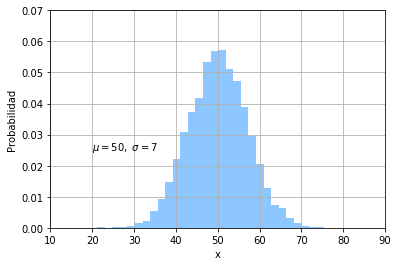

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Parámetros de la función gaussiana
mu, sigma = 50, 7

# Generamos un array utilizando esos parámetros y números aleatorios.
x = mu + sigma * np.random.randn(10000)

# La función 'hist' nos calcula la frecuencia y el número de barras. El argumento normed=1 normaliza los valores de
# probabilidad ([0,1]), facecolor controla el color del gráfico y alpha el valor de la transparencia de las barras.
n, bins, patches = plt.hist(x, 30, density=1, facecolor='dodgerblue', alpha=0.5)

plt.xlabel('x')
plt.ylabel('Probabilidad')

# Situamos el texto con los valores de mu y sigma en el gráfico.
plt.text(20, .025, r'$\mu=50,\ \sigma=7$')

# Controlamos manualmente el tamaño de los ejes. Los dos primeros valores se corresponden con xmin y xmax y los
# siguientes con ymin e ymax:
plt.axis([10, 90, 0, 0.07])

# Mostramos una rejilla.
plt.grid(True)

plt.show()

### Ejemplo 4: Representación del conjunto de Mandelbrot

El conjunto de Mandelbrot es uno de los conjuntos fractales más estudiados y conocidos. Podéis encontrar más información en línea sobre [el conjunto y los fractales en general](https://es.wikipedia.org/wiki/Conjunto_de_Mandelbrot).

El siguiente ejemplo es una adaptación de este [código original](https://scipy-lectures.github.io/intro/numpy/exercises.html#mandelbrot-set).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in less


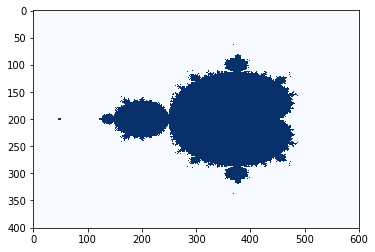

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

# La función que calculará el conjunto de Mandelbrot.
def mandelbrot(N_max, threshold, nx, ny):
    # Creamos un array con nx elementos entre los valores -2 y 1.
    x = np.linspace(-2, 1, nx)
    # Lo mismo, pero en este caso entre -1.5 y 1.5, de ny elementos.
    y = np.linspace(-1.5, 1.5, ny)
    
    # Creamos el plano de números complejos necesario para calcular el conjunto.
    c = x[:,newaxis] + 1j*y[newaxis,:]

    # Iteración para calcular el valor de un elemento en la sucesión.
    z = c
    for j in range(N_max):
        z = z**2 + c
    
    # Finalmente, calculamos si un elemento pertenece o no al conjunto poniendo un límite 'threshold'.
    conjunto = (abs(z) < threshold)
    
    return conjunto

conjunto_mandelbrot = mandelbrot(50, 50., 601, 401)

# Transponemos los ejes del conjunto de Mandelbrot calculado utilizando la función de numpy 'T'
# Utilizamos la función imshow para representar una matriz como una imagen. El argumento cmap significa
# 'color map' y es la escala de colores en la que representaremos nuestra imagen. Podéis encontrar muchos 
# otros mapas en la documentación oficial: http://matplotlib.org/examples/color/colormaps_reference.html
plt.imshow(conjunto_mandelbrot.T, cmap='Blues')

plt.show()

### Ejemplo 5: Manipulación de imágenes

Una imagen puede asimilarse a una matriz multidimensional donde para valores de píxeles (x,y) tenemos calores de color. Matplotlib nos permite leer imágenes, manipularlas y aplicarles distintos mapas de colores a la hora de representarlas. En el siguiente ejemplo, cargaremos una fotografía en formato PNG de Carl Sagan.

Créditos de la foto: NASA JPL

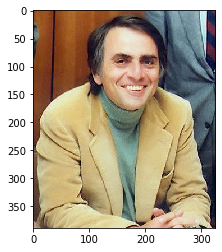

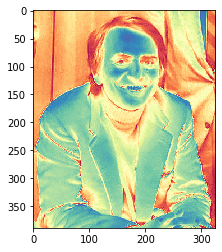

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Leemos la imagen mediante la función imread
carl = mpimg.imread('media/sagan.png')

# Podemos mostrar la imagen
plt.imshow(carl)
plt.show()

# Y podemos modificar los valores numéricos de color leídos por la función imread
# Obtenemos los valores de la escala de grises y mostramos los valores usando el mapa de
# colores Spectral
grises = np.mean(carl, 2)
plt.imshow(grises, cmap='Spectral')
plt.show()